In [1]:
import os
import time
import pandas as pd
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns
import mglearn

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

from sklearn.tree import DecisionTreeRegressor, plot_tree

# Import helperfunctions
from ML_functions import fun_load_file, fun_preprocessing, fun_fit_tuning
from ML_functions import fun_convert_time
from ML_functions import fun_tuning_results, fun_scores
from ML_functions import plot_feature_weights

# Start time count
start_script = time.time()

# Assign string 'TSP' or 'CVRP' to the following variable to define the routing problem
routing_problem = 'TSP'

# Get the name of the folder and the file to store the final DataFrame
if (routing_problem == 'TSP'):
    folder = '01_TSP'
    file_name = 'tsp_instances_j_updated.xlsx'
elif (routing_problem == 'CVRP'):
    folder = '02_CVRP'
    file_name = 'cvrp_instances_j_updated.xlsx'

# Load data
data = fun_load_file(subfolder_path='..\\01_data\\' + folder, name=file_name)
X, y, train_data = fun_preprocessing(data)

# Create a train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Save train size and create a dictionary to store the results
train_size = f'{int(np.round(100 * len(X_train)/len(X)))} %'
results_dict = {}

# **Decision Trees**
### **1. Randomized Grid Search**

In [2]:
# Randomized grid search cross validation
param_distributions = {'max_depth': range(10, 50),
                       'max_leaf_nodes': range(1400, 1800),
                       'min_samples_leaf': range(1, 20),
                       'min_impurity_decrease': uniform(0, 0.005)}

random_grid_search = RandomizedSearchCV(estimator=DecisionTreeRegressor(), param_distributions=param_distributions, cv=3,
                                        n_iter=200, scoring='neg_mean_absolute_percentage_error',
                                        verbose=False, n_jobs=-1, random_state=0)
fit_time = fun_fit_tuning(search_method=random_grid_search, X_train=X_train, y_train=y_train, file_name='DT_RGS_best_params.pkl')

# View results of grid search cross validation
model_results_dict = fun_scores(model=random_grid_search, X_train=X_train, y_train=y_train, cv=3)
model_results_dict['Grid Search CV computation time'] = fit_time

# Save results to dictionary
results_dict['Decision Tree (RGS)'] = model_results_dict

# View grid search CV scores of all parameter combinations
results_df = fun_tuning_results(search_method=random_grid_search, search_space=param_distributions)

CV MAPE train data:  14.693200000000001 %
CV RMSE train data:  2.7067

Best model / parameter combination:


{'max_depth': 10,
 'max_leaf_nodes': 1723,
 'min_impurity_decrease': 0.004289728088113784,
 'min_samples_leaf': 8}

Cross validation scores of different parameter combinations:


,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_impurity_decrease,mean_test_score,converted_mean_fit_time
0,10,1723,8,0.00429,-0.146932,0s
1,19,1611,5,0.003229,-0.149457,0s


### **2. Grid Search**

Fitting 3 folds for each of 24 candidates, totalling 72 fits
CV MAPE train data:  15.2363 %
CV RMSE train data:  0.9035

Best model / parameter combination:


{'max_depth': 20, 'min_impurity_decrease': 0.002}

Cross validation scores of different parameter combinations:


,param_max_depth,param_min_impurity_decrease,mean_test_score,converted_mean_fit_time
0,40,0.002,-0.152363,0s
1,30,0.002,-0.152363,0s
2,20,0.002,-0.152363,0s
3,35,0.002,-0.152363,0s
4,25,0.002,-0.152363,0s
5,15,0.002,-0.153044,0s
6,40,0.001,-0.154376,0s
7,20,0.001,-0.154376,0s
8,35,0.001,-0.154376,0s
9,25,0.001,-0.154376,0s


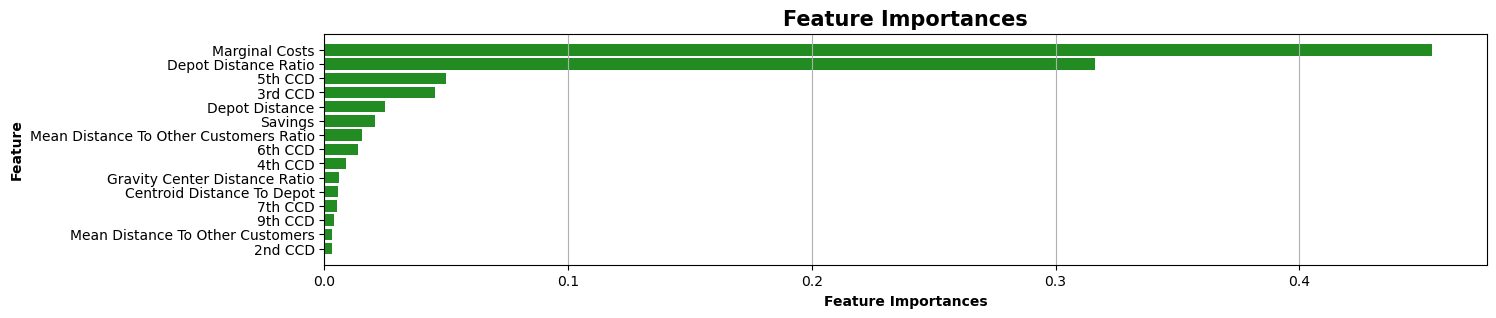

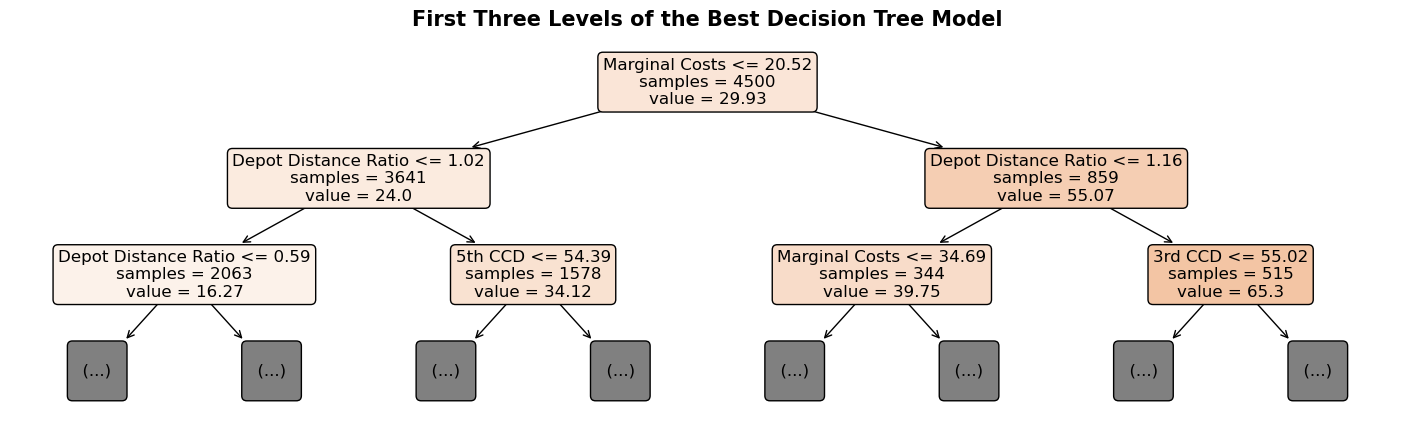

In [3]:
# Grid search cross validation
param_grid = {'max_depth': [15, 20, 25, 30, 35, 40],
              'max_leaf_nodes': [1600, 1700, 1800, 1900],
              'min_samples_leaf': [5, 10, 15, 20],
              'min_impurity_decrease': [0, 0.0001, 0.001, 0.002]}

grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv=3,
                           scoring='neg_mean_absolute_percentage_error', 
                           verbose=True, n_jobs=-1)
fit_time = fun_fit_tuning(search_method=grid_search, X_train=X_train, y_train=y_train, file_name='DT_GS_best_params.pkl')

# View results of grid search cross validation
model_results_dict = fun_scores(model=grid_search, X_train=X_train, y_train=y_train, cv=3)
model_results_dict['Grid Search CV computation time'] = fit_time

# Save results to dictionary
results_dict['Decision Tree (GS)'] = model_results_dict

# View grid search CV scores of all parameter combinations
results_df = fun_tuning_results(search_method=grid_search, search_space=param_grid)

# View feature importances of best estimator
plot_feature_weights(model=grid_search.best_estimator_, X_train=X_train, n_features=15)

# Visualize the tree
plt.figure(figsize=(18, 5))
plot_tree(decision_tree=grid_search.best_estimator_, max_depth=2, feature_names=X_train.columns, filled=True, 
          impurity=False, rounded=True, precision=2, fontsize=12)
plt.title('First Three Levels of the Best Decision Tree Model', size=15, fontweight='bold')
plt.show()

# **Compare Results**

In [4]:
display(pd.DataFrame(results_dict).sort_values(by='MAPE', axis=1))
print('Total script computation time:', fun_convert_time(start=start_script, end=time.time()))

,Decision Tree (RGS),Decision Tree (GS)
MAPE,14.6932,15.2363
RMSE,2.7067,0.9035
Grid Search CV computation time,4s,4s


Total script computation time: 6m, 24s
